In [1]:
###基础
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [111]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

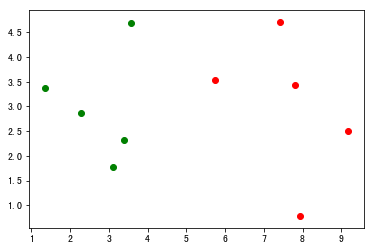

In [112]:

plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.show()

In [113]:
X_train[y_train==0,0]

array([3.39353321, 3.11007348, 1.34380883, 3.58229404, 2.28036244])

In [114]:
X_train[y_train==0,1]

array([2.33127338, 1.78153964, 3.36836095, 4.67917911, 2.86699026])

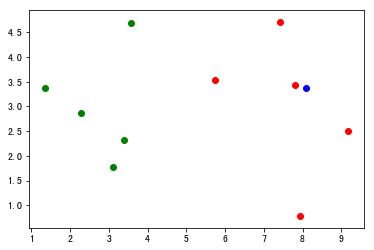

In [139]:

x = np.array([8.093607318, 3.365731514])

plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

In [135]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
k=3

In [143]:
#函数封装
from math import sqrt
from collections import Counter
def KNN_Classify(k,X_train,y_train,x):
    assert 1<= k <= X_train.shape[0], 'k must be valid'
    assert X_train.shape[1]==x.shape[1],'train feature must be equal to predict feature'
    assert X_train.shape[0]==y_train.shape[0], 'train record must be equal to label count'
    
    distances=[sqrt(sum((x_train-x)**2))
          for x_train in X_train]
    top_k=[y_train[nearest] for nearest in np.argsort(distances)[:k]]
    votes = Counter(top_k)
    result=votes.most_common(1)[0][0]

    return result


In [142]:
X_train.shape[1]
x.shape

(2,)

In [119]:
#调用SKlearn包
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier=KNeighborsClassifier(n_neighbors=6) #指定k
KNN_classifier.fit(X_train,y_train)  #拟合模型
KNN_classifier.predict(x.reshape(1,-1))  #对新数据进行预测


array([1])

In [120]:
###03测试集，训练集
from sklearn import datasets

#iris数据集
iris=datasets.load_iris()
iris.keys()
X=iris.data
y=iris.target

In [227]:
#iris
def train_test_split(X,y,test_ratio=0.2,seed=None):
    assert X.shape[0]==y.shape[0],'recode of X must be equal to the label'
    assert 0<= test_ratio <=1,'test_ratio must be in (0,1)'
    shuffled_indexes=np.random.permutation(len(X))  #打乱数据的index
    test_size=int(len(X)*test_ratio)
    test_indexes=shuffled_indexes[:test_size]
    train_indexes=shuffled_indexes[test_size:]
    X_train=X[train_indexes]
    y_train=y[train_indexes]
    X_test=X[test_indexes]
    y_test=y[test_indexes]
    return X_train,y_train,X_test,y_test


In [122]:
X_train,y_train,X_test,y_test=train_test_split(X,y)

In [123]:
KNN_classifier_iris=KNeighborsClassifier(n_neighbors=3) #指定k
KNN_classifier_iris.fit(X_train,y_train)
y_predict_iris=KNN_classifier_iris.predict(X_test)

In [124]:
y_predict_iris

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2,
       1, 0, 1, 1, 0, 2, 0, 2])

In [125]:
y_test

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2,
       1, 0, 1, 1, 0, 2, 0, 2])

In [126]:
print('%2f' %(sum(y_predict_iris==y_test)/len(y_test)))

0.966667


In [209]:
#04对更大数据集进行测试（digit）、accuracy准确率
digits=datasets.load_digits()
digits.keys()
X=digits.data
X.shape
y=digits.target
y.shape

(1797,)

In [128]:
some_digit=X[111]
print(some_digit)
some_target=y[111]
some_target

[ 0.  0.  1. 10.  9.  0.  0.  0.  0.  0.  9. 15.  4.  0.  0.  0.  0.  1.
 16.  5.  0.  0.  0.  0.  0.  4. 16.  1.  4. 14.  4.  0.  0.  4. 16. 12.
 14. 16.  5.  0.  0.  0.  1.  7. 16.  9.  0.  0.  0.  0.  0.  2. 16.  4.
  0.  0.  0.  0.  0. 10. 13.  0.  0.  0.]


4

In [129]:
some_digit_image=some_digit.reshape(8,8)
some_digit_image

array([[ 0.,  0.,  1., 10.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  1., 16.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  4., 16.,  1.,  4., 14.,  4.,  0.],
       [ 0.,  4., 16., 12., 14., 16.,  5.,  0.],
       [ 0.,  0.,  1.,  7., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 10., 13.,  0.,  0.,  0.]])

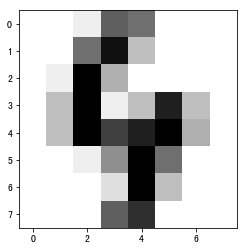

In [130]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
plt.show()

In [228]:
#用刚创建的函数测试
X_train,y_train,X_test,y_test=train_test_split(X,y)

from KNN_2 import KNNClassifier
KNN_classifier_digit=KNNClassifier(k=3)
KNN_classifier_digit.fit(X_train, y_train)
y_predict = KNN_classifier_digit.predict(X_test)
sum(y_predict==y_test)/len(y_test)

0.9805013927576601

In [214]:
X_train.shape
y_train.shape

(1347, 64)

In [204]:
#用sklearn
from sklearn.model_selection import train_test_split  #训练集、测试集
from sklearn.neighbors import KNeighborsClassifier   #模型
from sklearn.metrics import accuracy_score    #准确率

KNN_classifier_digit_m=KNeighborsClassifier(n_neighbors=3)
KNN_classifier_digit_m.fit(X_train, y_train)
y_predict = KNN_classifier_digit_m.predict(X_test)
accuracy_score(y_test, y_predict)




0.9888579387186629

In [221]:
#05超参数选择(网格搜索):k与method
best_method=''
best_score=0.0
best_k=-1
for method in ['uniform','distance']:
    for k in range(1,11):
        knn_clf=KNeighborsClassifier(n_neighbors=k,weights=method)
        knn_clf.fit(X_train,y_train)
        score=knn_clf.score(X_test,y_test)
        if score > best_score:
            best_k=k
            best_score=score
            best_method=method
print('best_k=' , best_k)
print('best_score:',best_score)
print('best_method:' ,best_method)

best_k= 4
best_score: 0.9888579387186629
best_method: uniform


In [231]:
#05超参数选择（网格搜索）:p，只有在distance条件下才有意义

best_p=-1
best_score=0.0
best_k=-1

for k in range(1,11):
    for p in range(1,6):
        knn_clf=KNeighborsClassifier(n_neighbors=k,weights='distance',p=p)
        knn_clf.fit(X_train,y_train)
        score=knn_clf.score(X_test,y_test)
        if score > best_score:
            best_k=k
            best_score=score
            best_p=p
print('best_k=' , best_k)
print('best_score:',best_score)
print('best_p:' ,best_p)



best_k= 1
best_score: 0.9832869080779945
best_p: 4


In [235]:
#网格搜索超参数：Grid Search,运用sklearn中的模块
from sklearn.model_selection import GridSearchCV    #(cross validation交叉验证)

param_grid = [
    {
        'weights': ['uniform'], 
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)], 
        'p': [i for i in range(1, 6)]
    }
]


In [238]:

knn_clf = KNeighborsClassifier()    #指定不含有参数的分类器
grid_search=GridSearchCV(knn_clf,param_grid)


In [239]:
%%time
grid_search.fit(X_train,y_train)


CPU times: user 1min 38s, sys: 91.6 ms, total: 1min 38s
Wall time: 1min 38s


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [242]:
grid_search.best_estimator_
grid_search.best_score_
%%time
grid_search=GridSearchCV(knn_clf,param_grid,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)
#n_jobs核，verbose显示进程



0.9867872044506258

In [2]:
#数据归一化
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris=datasets.load_iris()
iris.keys()
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=666)
#split时一定要注意X_train, X_test, y_train, y_test顺序

In [4]:
#使用SKlearn包归一化
from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()
standardScaler.fit(X_train)
standardScaler.mean_
standardScaler.scale_
X_train=standardScaler.transform(X_train)
X_train



array([[-0.90616043,  0.94720873, -1.30982967, -1.28485856],
       [-1.15301457, -0.18717298, -1.30982967, -1.28485856],
       [-0.16559799, -0.64092567,  0.22169257,  0.17345038],
       [ 0.45153738,  0.72033239,  0.95909217,  1.49918578],
       [-0.90616043, -1.3215547 , -0.40226093, -0.0916967 ],
       [ 1.43895396,  0.2665797 ,  0.56203085,  0.30602392],
       [ 0.3281103 , -1.09467835,  1.07253826,  0.30602392],
       [ 2.1795164 , -0.18717298,  1.63976872,  1.2340387 ],
       [-0.78273335,  2.30846679, -1.25310662, -1.4174321 ],
       [ 0.45153738, -2.00218372,  0.44858475,  0.43859746],
       [ 1.80923518, -0.41404933,  1.46959958,  0.83631808],
       [ 0.69839152,  0.2665797 ,  0.90236912,  1.49918578],
       [ 0.20468323,  0.72033239,  0.44858475,  0.571171  ],
       [-0.78273335, -0.86780201,  0.10824648,  0.30602392],
       [-0.53587921,  1.40096142, -1.25310662, -1.28485856],
       [-0.65930628,  1.40096142, -1.25310662, -1.28485856],
       [-1.0295875 ,  0.

In [5]:
X_test_standard=standardScaler.transform(X_test)
X_test_standard

array([[-0.28902506, -0.18717298,  0.44858475,  0.43859746],
       [-0.04217092, -0.64092567,  0.78892303,  1.63175932],
       [-1.0295875 , -1.77530738, -0.2320918 , -0.22427024],
       [-0.04217092, -0.86780201,  0.78892303,  0.96889162],
       [-1.52329579,  0.03970336, -1.25310662, -1.28485856],
       [-0.41245214, -1.3215547 ,  0.16496953,  0.17345038],
       [-0.16559799, -0.64092567,  0.44858475,  0.17345038],
       [ 0.82181859, -0.18717298,  0.84564608,  1.10146516],
       [ 0.57496445, -1.77530738,  0.39186171,  0.17345038],
       [-0.41245214, -1.09467835,  0.39186171,  0.04087684],
       [ 1.06867274,  0.03970336,  0.39186171,  0.30602392],
       [-1.64672287, -1.77530738, -1.36655271, -1.15228502],
       [-1.27644165,  0.03970336, -1.19638358, -1.28485856],
       [-0.53587921,  0.72033239, -1.25310662, -1.01971148],
       [ 1.68580811,  1.17408507,  1.35615349,  1.76433286],
       [-0.04217092, -0.86780201,  0.22169257, -0.22427024],
       [-1.52329579,  1.

In [6]:
#使用SKlearn包进行KNN分类
from sklearn.neighbors import KNeighborsClassifier
knn_clf_nor=KNeighborsClassifier(n_neighbors=3)
knn_clf_nor.fit(X_train,y_train)
knn_clf_nor.score(X_test_standard,y_test)
# 容易报错计算为传入未归一化的测试数据，重新运行此脚本即可

1.0

In [5]:
#使用自己写的底层包归一化
from KNN.preprocessing import StandardScaler
my_standardScalar = StandardScaler() 
my_standardScalar = StandardScaler() 
my_standardScalar.fit(X_train)
X_train = my_standardScalar.transform(X_train)
X_train

array([[-0.90616043,  0.94720873, -1.30982967, -1.28485856],
       [-1.15301457, -0.18717298, -1.30982967, -1.28485856],
       [-0.16559799, -0.64092567,  0.22169257,  0.17345038],
       [ 0.45153738,  0.72033239,  0.95909217,  1.49918578],
       [-0.90616043, -1.3215547 , -0.40226093, -0.0916967 ],
       [ 1.43895396,  0.2665797 ,  0.56203085,  0.30602392],
       [ 0.3281103 , -1.09467835,  1.07253826,  0.30602392],
       [ 2.1795164 , -0.18717298,  1.63976872,  1.2340387 ],
       [-0.78273335,  2.30846679, -1.25310662, -1.4174321 ],
       [ 0.45153738, -2.00218372,  0.44858475,  0.43859746],
       [ 1.80923518, -0.41404933,  1.46959958,  0.83631808],
       [ 0.69839152,  0.2665797 ,  0.90236912,  1.49918578],
       [ 0.20468323,  0.72033239,  0.44858475,  0.571171  ],
       [-0.78273335, -0.86780201,  0.10824648,  0.30602392],
       [-0.53587921,  1.40096142, -1.25310662, -1.28485856],
       [-0.65930628,  1.40096142, -1.25310662, -1.28485856],
       [-1.0295875 ,  0.